<div style="background:rgb(202, 255, 251); color: #003366; font-family: monospace; font-weight: bold; font-size: 220%; text-align: center; border-bottom: 2px solid #3366ff;">
  INTRODUCTION
</div>

The Walmart Sales Forecasting Dataset is a real-world dataset provided by Walmart to help develop models for predicting weekly sales across different stores and departments. It contains historical sales data collected from various Walmart outlets across the United States. The dataset includes a range of variables that can influence sales such as temperature, fuel prices, consumer price index (CPI), unemployment rates, and whether the week includes a holiday. 


<b>The data contains the following columns:</b>

1. Store: Store number
2. Date: Sales week start date
3. Weekly_Sales: Sales
4. Holiday_Flag: Mark on the presence or absence of a holiday
5. Temperature: Air temperature in the region
6. Fuel_Price: Fuel cost in the region
7. CPI: Consumer price index
8. Unemployment: Unemployment rate

<div style="background:rgb(202, 255, 251); color: #003366; font-family: monospace; font-weight: bold; font-size: 220%; text-align: center; border-bottom: 2px solid #3366ff;">
  PROJECT OVERVIEW
</div>

<br> </br>
1. [UNDERSTANDING THE DATASET](#1)
2. [EXPLORATORY DATA ANALYSIS](#2)
3. [PREPROCESSING & DATA PREPARATION](#3)
4. [MODEL SELECTION & TRAINING](#4)
5. [HYPERPARAMETER TUNING](#5)
6. [VISUALIZATION OF RESULTS](#6)
7. [CONCLUSION](#7)


<a id="1"></a>
<div style="background:rgb(202, 255, 251); color: #003366; font-family: monospace; font-weight: bold; font-size: 220%; text-align: center; border-bottom: 2px solid #3366ff;">
  1. UNDERSTANDING THE DATASET
</div>


In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from scipy import stats

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from scipy.stats import uniform, randint

from xgboost import XGBRegressor

### 1.1 Loading the dataset and exploring its structure

In [2]:
df = pd.read_csv ("C:/Users/Forza Motorsport/.cache/kagglehub/datasets/mikhail1681/walmart-sales/versions/2/Walmart_Sales.csv")

In [3]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


### 1.2 Checking the datatype and information of the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


### 1.3 Checking null values

In [5]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

### 1.4 Checking the count of number of times each unique row appeared in a DataFrame.

In [6]:
df.value_counts()

Store  Date        Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  CPI         Unemployment
1      01-04-2011  1495064.75    0             59.17        3.524       214.837166  7.682           1
30     30-09-2011  387001.13     0             78.91        3.355       216.362033  7.852           1
31     02-07-2010  1311704.92    0             82.29        2.669       210.880373  8.099           1
       02-04-2010  1357600.68    0             64.12        2.719       210.479887  8.200           1
       02-03-2012  1427881.22    0             59.30        3.630       220.486689  7.057           1
                                                                                                   ..
15     30-12-2011  603460.79     1             31.44        3.566       136.643258  7.866           1
       30-09-2011  521297.31     0             64.87        3.858       136.419500  7.806           1
       30-07-2010  619224.06     0             72.04        2.932       132.598387  8.0

### 1.5 Checking duplicates

In [7]:
if df.duplicated().sum() == 0 :
    print ("There are no duplicate values present")

else :
    print (f"The data has {df.duplicated().sum()} values")

There are no duplicate values present


### 1.6 Checking the shape of database

In [8]:
print (f"The database has {df.shape[0]} rows and {df.shape[1]} columns")

The database has 6435 rows and 8 columns


### 1.7 Since the following datetime column has 'object' datatype, so we need to convert to 'datetime' format and extract the dates to get proper analysis.

In [9]:
df['Date'] = pd.to_datetime(df['Date'], format="%d-%m-%Y")

### 1.8 Extracting Year, Month and Day from date

In [10]:
# Extract year from the 'Date' column
df['Year'] = df['Date'].dt.year

# Extract month from the 'Date' column
df['Month'] = df['Date'].dt.month

# Extracts the week number from 'Date' column
df['Week'] = df['Date'].dt.isocalendar().week

# Extract day from the 'Date' column
df['Day'] = df['Date'].dt.day

# Assigning day of the week (0 = Monday, 1 = Tuesday, 2 = Wednesday)
df['DayOfWeek'] = df['Date'].dt.dayofweek 

# Assigning the weekend days as 1 and weekdays as 0
df['Is_Weekend'] = df['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)


### 1.9 Adding another column where 0 = 'Non-Holiday' 1 = 'Holiday'

In [11]:
df['Holiday_Label'] = df['Holiday_Flag'].map({0: 'Non-Holiday', 1: 'Holiday'})


### 1.10 Assigning labels based on temperature provided

In [12]:
df['Temp_Range'] = pd.cut(df['Temperature'],
                          bins=[-10, 32, 60, 80, 120], 
                          labels=['Freezing', 'Cold', 'Mild', 'Hot'])


### 1.11 Bucketing Fuel Price based on price provided

In [13]:
df['Fuel_Level'] = pd.cut(df['Fuel_Price'],
                          bins=3, 
                          labels=['Low', 'Medium', 'High'])

In [14]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week,Day,DayOfWeek,Is_Weekend,Holiday_Label,Temp_Range,Fuel_Level
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5,5,4,0,Non-Holiday,Cold,Low
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,6,12,4,0,Holiday,Cold,Low
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,7,19,4,0,Non-Holiday,Cold,Low
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,8,26,4,0,Non-Holiday,Cold,Low
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,9,5,4,0,Non-Holiday,Cold,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012,9,39,28,4,0,Non-Holiday,Mild,High
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,2012,10,40,5,4,0,Non-Holiday,Mild,High
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,2012,10,41,12,4,0,Non-Holiday,Cold,High
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012,10,42,19,4,0,Non-Holiday,Cold,High


---------------------------

<a id="2"></a>
<div style="background:rgb(202, 255, 251); color: #003366; font-family: monospace; font-weight: bold; font-size: 220%; text-align: center; border-bottom: 2px solid #3366ff;">
  2. EXPLORATORY DATA ANALYSIS
</div>

### 2.1 Distribution of weekly sales
#### Right-skewed distribution: Most weekly sales are below $1.5 million.
#### A long tail suggests a few stores or periods experience very high sales.

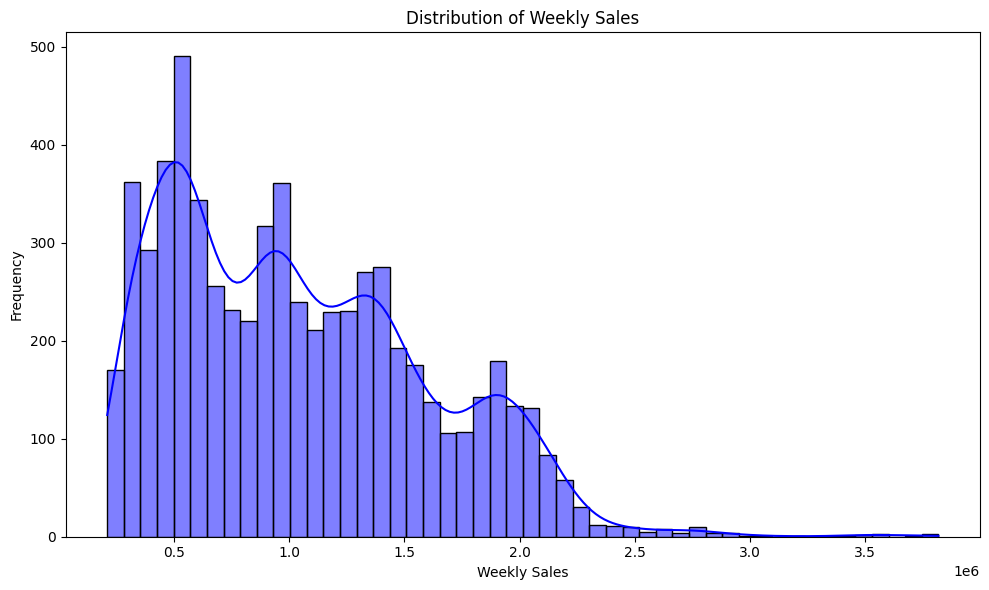

In [15]:
# 1. Distribution of Weekly Sales
plt.figure(figsize=(10, 6))
sns.histplot(df['Weekly_Sales'], bins=50, kde=True, color='blue')
plt.title('Distribution of Weekly Sales')
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### 2.2 Boxplot of Weekly Sales
#### Significant outliers: There are many weekly sales values well above the upper quartile. These high values should be analyzed (e.g., linked to promotions, holidays, or specific stores).

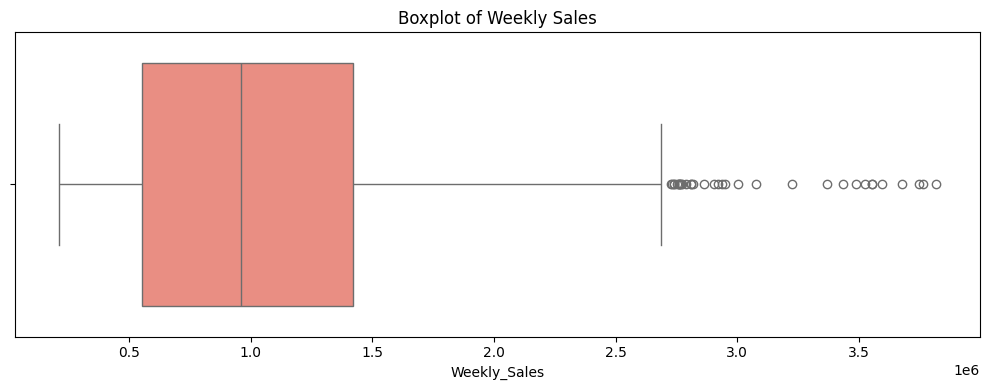

In [16]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['Weekly_Sales'], color='salmon')
plt.title('Boxplot of Weekly Sales')
plt.tight_layout()
plt.show()

### 2.3 Correlation Heatmap
#### Used a heatmap to examine the correlation between sales and external factors like temperature, fuel price, CPI, and unemployment.

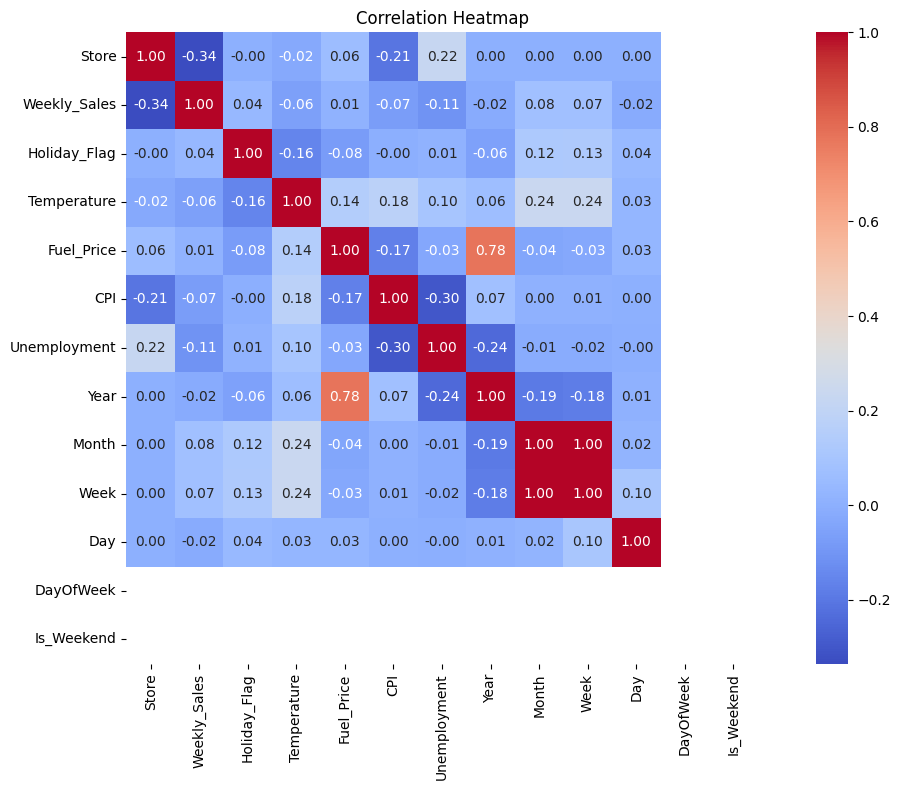

In [17]:
plt.figure(figsize=(12, 8))
corr = df.select_dtypes(include=np.number).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

#### Weekly_Sales positively correlates with CPI, Fuel_Price, and Temperature (weak to moderate).
#### No strong linear correlation with other variables. This implies non-linear models (e.g., tree-based) may be more effective.

### 2.4 Weekly Sales Over Time
#### Noticeable spikes in sales, likely around holidays or special events. Some seasonality can be inferred, with peaks recurring annually.

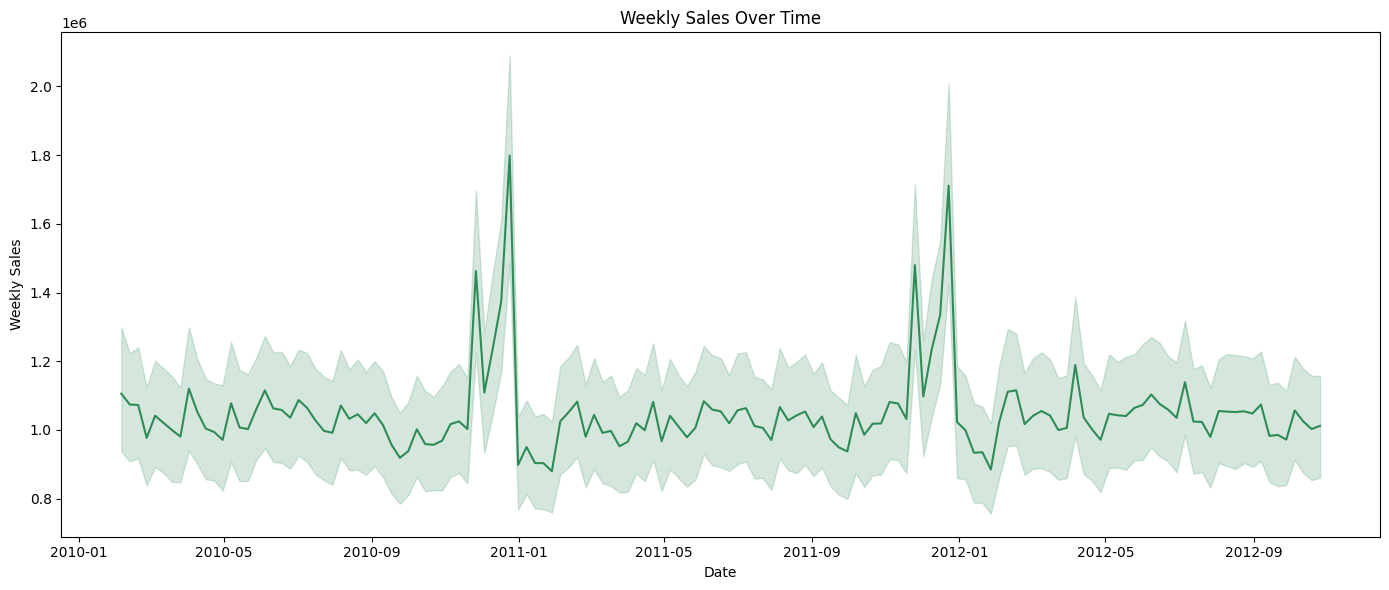

In [18]:
plt.figure(figsize=(14, 6))
df_sorted = df.sort_values('Date')
sns.lineplot(data=df_sorted, x='Date', y='Weekly_Sales', color='seagreen')
plt.title('Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.tight_layout()
plt.show()

### 2.5 Holiday VS Non-Holiday
#### Compared weekly sales during holiday periods with non-holiday periods to evaluate the impact of holidays on sales performance.

Text(0.5, 1.0, 'Sales Comparison: Holiday vs Non-Holiday Weeks')

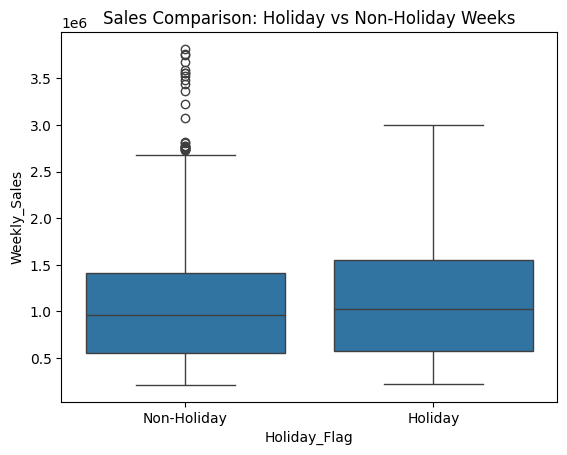

In [19]:
sns.boxplot(x='Holiday_Flag', y='Weekly_Sales', data=df)
plt.xticks([0,1], ['Non-Holiday', 'Holiday'])
plt.title("Sales Comparison: Holiday vs Non-Holiday Weeks")

#### We can observe that there are outliers in Non-Holiday where individual weeks have generated above average sales. Holiday weeks tend to drive higher and more variable sales which shows holidays positively impact weekly sales for some stores.

### 2.6 Temperature Range vs Weekly Sales
### Exploring new feature

<Axes: xlabel='Temp_Range', ylabel='Weekly_Sales'>

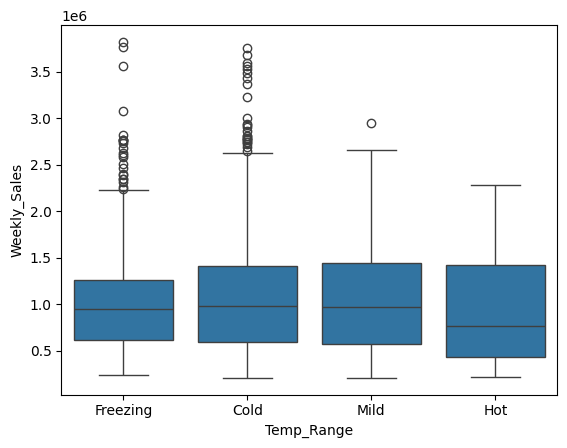

In [20]:
sns.boxplot(x='Temp_Range', y='Weekly_Sales', data=df)


#### Cold has the widest spread and many outliers, suggesting variable sales during cold weather. Hot weather generally correlates with lower sales, possibly due to reduced shopping activity. Sales appear most consistent in the Cool range, indicating moderate temperatures may encourage shopping.

### 2.7 Fuel Level vs Weekly Sales

<Axes: xlabel='Fuel_Level', ylabel='Weekly_Sales'>

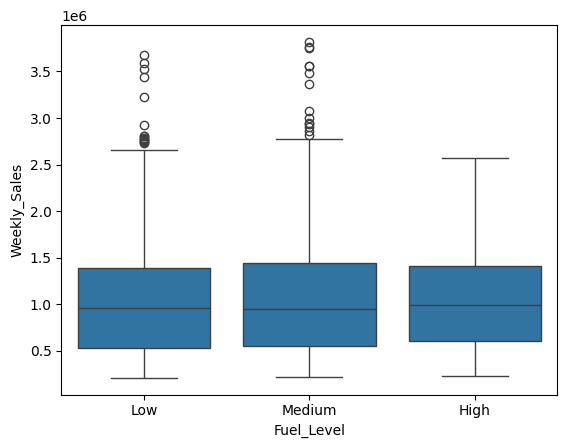

In [21]:
sns.boxplot(x='Fuel_Level', y='Weekly_Sales', data=df)

#### 'Low' and 'Medium' fuel levels show greater sales variability and occasional spikes which suggests that lower fuel prices may promote increased consumer spending.

### 2.8 Distribution Plots
#### Understand the distribution of key variables.

<Axes: xlabel='Weekly_Sales', ylabel='Count'>

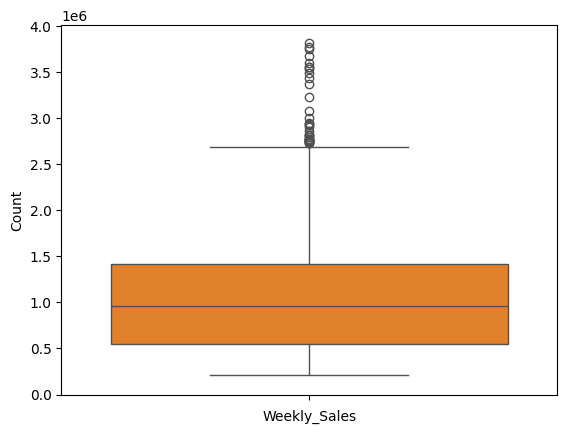

In [22]:
sns.histplot(df['Weekly_Sales'], kde=True)
sns.boxplot(df['Weekly_Sales'])

#### In the above case, we see the presence of outliers so its necessary to clear the data. So, we are calculating the Quartiles (Q1 and Q3) and Interquartile range (IQR) for the 'Weekly_Sales' column to detect outliers.

In [23]:
df.describe()[['Weekly_Sales']]

,Weekly_Sales
count,6.435000e+03
mean,1.046965e+06
min,2.099862e+05
25%,5.533501e+05
50%,9.607460e+05
75%,1.420159e+06
max,3.818686e+06
std,5.643666e+05


In [24]:
Q1 = df['Weekly_Sales'].quantile(0.25)
Q3 = df['Weekly_Sales'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Weekly_Sales'] < lower_bound) | (df['Weekly_Sales'] > upper_bound)]
print(f"Number of outliers: {len(outliers)}")


Number of outliers: 34


### 2.9 Using Cap/Floor (Winsorization) for keeping all rows but limiting extreme influence.

In [25]:
df['Weekly_Sales'] = df['Weekly_Sales'].clip(lower=lower_bound, upper=upper_bound)


### 2.10 Updated Boxplot

<Axes: xlabel='Weekly_Sales', ylabel='Count'>

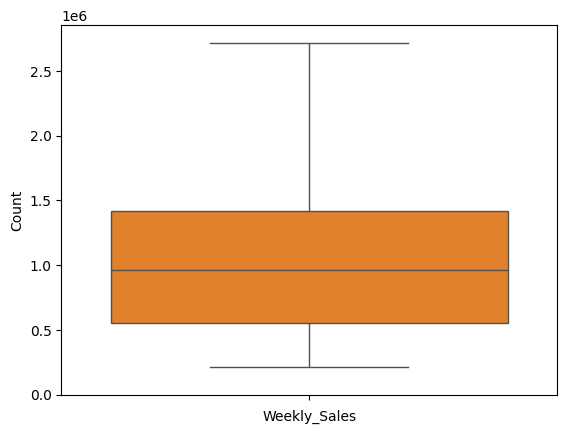

In [26]:
sns.histplot(df['Weekly_Sales'], kde=True)
sns.boxplot(df['Weekly_Sales'])

#### Adding another column 'PreHoliday_Week' since majority of extreme outliers are from late December, likely reflecting Christmas shopping spikes. None are flagged as holidays (Holiday_Flag = 0), so these may be pre-holiday surges.

### 2.11 Adding another column 'Preholiday_Week'

In [27]:
df['PreHoliday_Week'] = df['Date'].apply(lambda x: x.month == 12 and 18 <= x.day <= 24)

### 2.12 Boxplot comparing Pre-Holiday and Other weeks

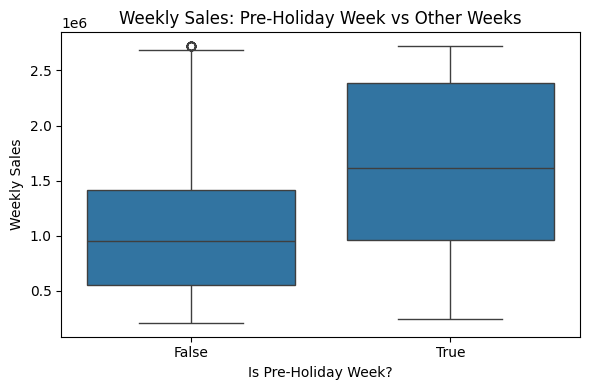

In [28]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='PreHoliday_Week', y='Weekly_Sales', data=df)
plt.title("Weekly Sales: Pre-Holiday Week vs Other Weeks")
plt.xlabel("Is Pre-Holiday Week?")
plt.ylabel("Weekly Sales")
plt.tight_layout()
plt.show()

### 2.13 Statistical Testing
#### Performed an independent t-test to determine if the difference in average sales between holiday and non-holiday weeks was statistically significant.

In [29]:
from scipy.stats import ttest_ind
holiday_sales = df[df['Holiday_Flag'] == 1]['Weekly_Sales']
nonholiday_sales = df[df['Holiday_Flag'] == 0]['Weekly_Sales']
t_stat, p_val = ttest_ind(holiday_sales, nonholiday_sales)
print(f"T-stat: {t_stat}, P-value: {p_val}")


T-stat: 2.945772378531185, P-value: 0.003233042166238275


#### Since the p-value < 0.05, we reject the null hypothesis. There is a statistically significant difference in weekly sales between holiday and non-holiday weeks. This confirms that holidays tend to boost sales in particular timeframes or store locations.

-------------

<a id="3"></a>
<div style="background:rgb(202, 255, 251); color: #003366; font-family: monospace; font-weight: bold; font-size: 220%; text-align: center; border-bottom: 2px solid #3366ff;">
  3. PREPROCESSING & DATA PREPARATION
</div>

In [30]:
df['Weekly_Sales'].mean()

1045029.2189176378

### 3.1 Encode Categorical Variables
#### Using one-hot encoding or label encoding for non-numeric features:

In [31]:
df = pd.get_dummies(df, columns=['Temp_Range', 'Fuel_Level', 'Holiday_Label'], drop_first=True)


### 3.2 Feature Scaling
#### Scale features to standardize the range:

In [32]:
scaler = StandardScaler()

df[['CPI', 'Unemployment', 'Fuel_Price', 'Temperature']] = scaler.fit_transform(df[['CPI', 'Unemployment', 'Fuel_Price', 'Temperature']])


### 3.3 Model Building (Regression)
#### You want to predict Weekly Sales, so it's a regression problem

In [33]:

X = df.drop(columns=['Weekly_Sales', 'Date'], axis = 1)  # Drop target and non-useful features

y = df['Weekly_Sales'] # Target Variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


_______________________

<a id="4"></a>
<div style="background:rgb(202, 255, 251); color: #003366; font-family: monospace; font-weight: bold; font-size: 220%; text-align: center; border-bottom: 2px solid #3366ff;">
  4. MODEL SELECTION & TRAINING
</div>

### 4.1 Linear Regression

In [34]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R2 Score:", r2_score(y_test, y_pred_lr))


MSE: 258144114334.43314
RMSE: 508078.8465724913
R2 Score: 0.1735846796959457


### 4.2 Decision Tree

In [35]:
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)
tree_preds = tree.predict(X_test)

y_pred_tree = tree.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred_tree))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_tree)))
print("R2 Score:", r2_score(y_test, y_pred_tree))

MSE: 16725408796.221167
RMSE: 129326.75205161989
R2 Score: 0.9464557458411065


### 4.3 Random Forest

In [36]:
forest = RandomForestRegressor(random_state=42)
forest.fit(X_train, y_train)
forest_preds = forest.predict(X_test)

y_pred_rf = forest.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R2 Score:", r2_score(y_test, y_pred_rf))

MSE: 9693379981.599304
RMSE: 98454.96423034901
R2 Score: 0.9689678854659296


### 4.4 XG Gradient Boosting

In [37]:
xgb = XGBRegressor(random_state=42, verbosity=0)
xgb.fit(X_train, y_train)
xgb_preds = xgb.predict(X_test)

y_pred_xgb = xgb.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred_xgb))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
print("R2 Score:", r2_score(y_test, y_pred_xgb))

MSE: 6144041621.795317
RMSE: 78383.93726903055
R2 Score: 0.9803306376442915


-----------------

<a id="5"></a>
<div style="background:rgb(202, 255, 251); color: #003366; font-family: monospace; font-weight: bold; font-size: 220%; text-align: center; border-bottom: 2px solid #3366ff;">
  5. HYPERPARAMETER TUNING
</div>

### 5.1 Using Randomized Search for XG Boost

In [38]:
# Parameter distributions
param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.5, 0.5),
    'colsample_bytree': uniform(0.5, 0.5)
}

xgb_model = XGBRegressor(random_state=42, verbosity=0)

random_search = RandomizedSearchCV(estimator=xgb_model,
                                   param_distributions=param_dist,
                                   n_iter=20,
                                   scoring='neg_mean_squared_error',
                                   cv=3,
                                   n_jobs=-1,
                                   verbose=1,
                                   random_state=42)

random_search.fit(X_train, y_train)

# Predictions & Evaluation
best_xgb_random = random_search.best_estimator_
y_pred_random = best_xgb_random.predict(X_test)

print("Best Random Params:", random_search.best_params_)
print("Random Search MSE:", mean_squared_error(y_test, y_pred_random))
print("Random Search RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_random)))
print("Random Search R2:", r2_score(y_test, y_pred_random))


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Random Params: {'colsample_bytree': 0.8776807051588262, 'learning_rate': 0.13754676234737342, 'max_depth': 8, 'n_estimators': 205, 'subsample': 0.7838501639099957}
Random Search MSE: 5980070327.32754
Random Search RMSE: 77330.9144348335
Random Search R2: 0.9808555707429508


### 5.2 Using GridSearchCV for XG Boost to fine tune hyperparameters for the best model

In [39]:
# Parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 1],
    'colsample_bytree': [0.7, 1]
}

xgb_model = XGBRegressor(random_state=42, verbosity=0)

grid_search = GridSearchCV(estimator=xgb_model,
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',
                           cv=3,
                           n_jobs=-1,
                           verbose=1)

grid_search.fit(X_train, y_train)

# Predictions & Evaluation
best_xgb_grid = grid_search.best_estimator_
y_pred_grid = best_xgb_grid.predict(X_test)

print("Best Grid Params:", grid_search.best_params_)
print("Grid Search MSE:", mean_squared_error(y_test, y_pred_grid))
print("Grid Search RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_grid)))
print("Grid Search R2:", r2_score(y_test, y_pred_grid))


Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best Grid Params: {'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.7}
Grid Search MSE: 5808634529.2623005
Grid Search RMSE: 76214.3984379743
Grid Search R2: 0.9814044004938632


#### After hyperparameter tuning it is observed that GridSearch tends to perform better than other models. So we assign GridSearch as our best model

In [40]:
best_model = grid_search.best_estimator_

### 5.3 Feature Importance Check

#### Feature importance measures how useful each feature was in making accurate splits to reduce prediction error.
#### Higher values → feature was used frequently and effectively.
#### Lower values → feature had little to no impact on model performance.

In [41]:
importances = forest.feature_importances_
features = X.columns
sorted_idx = np.argsort(importances)[::-1]

for i in sorted_idx:
    print(f"{features[i]}: {importances[i]:.4f}")


Store: 0.6662
CPI: 0.1515
Unemployment: 0.1101
Week: 0.0254
PreHoliday_Week: 0.0142
Temperature: 0.0096
Day: 0.0091
Fuel_Price: 0.0090
Month: 0.0024
Year: 0.0009
Holiday_Label_Non-Holiday: 0.0004
Holiday_Flag: 0.0003
Temp_Range_Cold: 0.0003
Fuel_Level_Medium: 0.0003
Temp_Range_Mild: 0.0002
Fuel_Level_High: 0.0001
Temp_Range_Hot: 0.0001
Is_Weekend: 0.0000
DayOfWeek: 0.0000


#### From the above case we can say that 'Store' overwhelmingly dominates the model's decisions and 'CPI' and 'Unemployment' are the next most impactful features. Features like 'Is_Weekend' and 'DayOfWeek' had almost no influence.

-----------------

<a id="6"></a>
<div style="background:rgb(202, 255, 251); color: #003366; font-family: monospace; font-weight: bold; font-size: 220%; text-align: center; border-bottom: 2px solid #3366ff;">
  6. VISUALIZATION OF RESULTS
</div>

### 6.1 Linear Regression: Actual VS Predicted Weekly sales

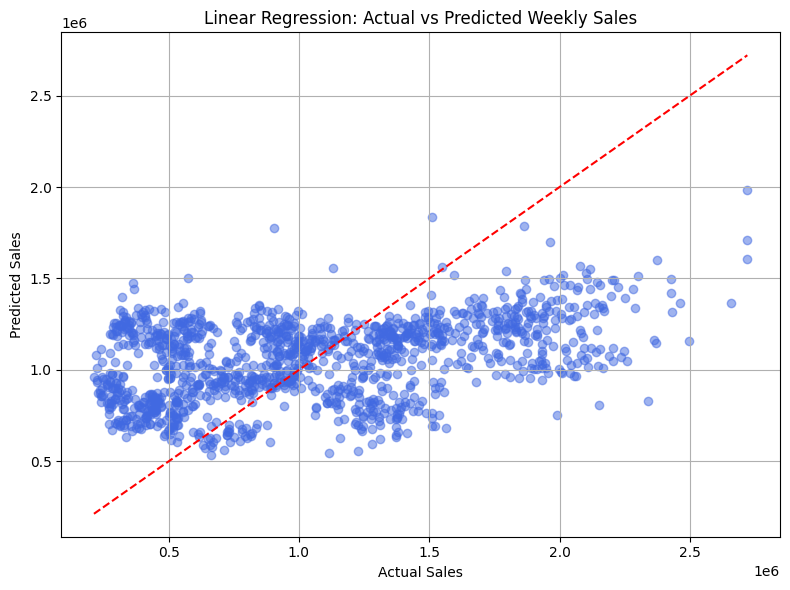

In [42]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_lr, alpha=0.5, color='royalblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Linear Regression: Actual vs Predicted Weekly Sales")
plt.grid(True)
plt.tight_layout()
plt.show()


### 6.2 Decision Tree: Actual VS Predicted Weekly sales

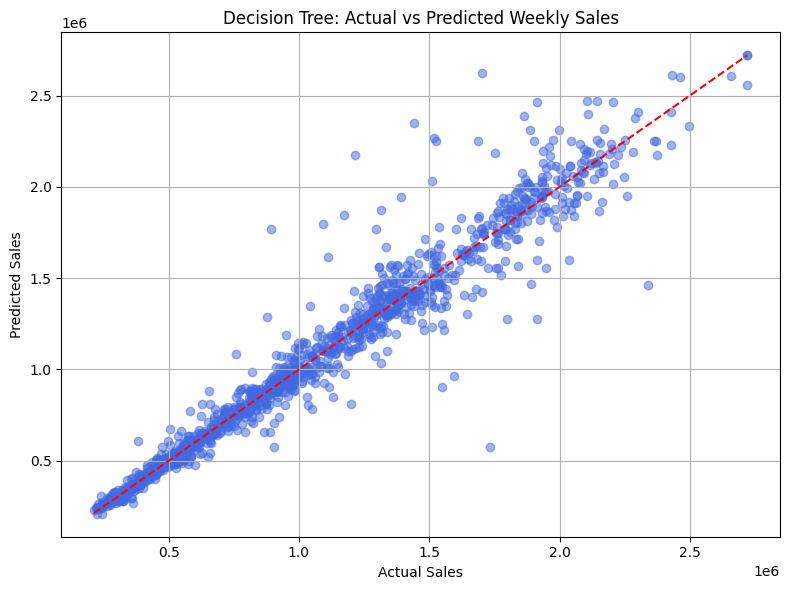

In [43]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_tree, alpha=0.5, color='royalblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Decision Tree: Actual vs Predicted Weekly Sales")
plt.grid(True)
plt.tight_layout()
plt.show()


### 6.3 Random Forest: Actual VS Predicted Weekly sales

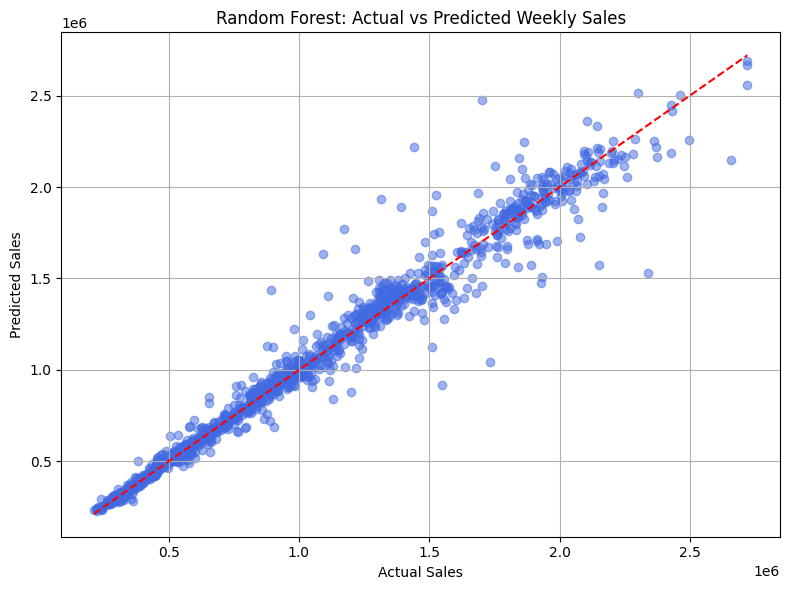

In [44]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='royalblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Random Forest: Actual vs Predicted Weekly Sales")
plt.grid(True)
plt.tight_layout()
plt.show()


### 6.4 XG Boost: Actual VS Predicted Weekly sales

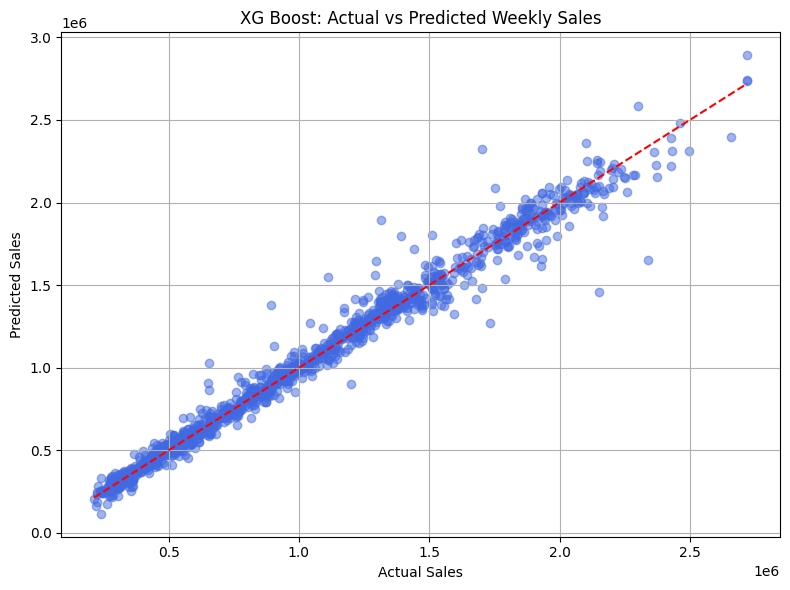

In [45]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_xgb, alpha=0.5, color='royalblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("XG Boost: Actual vs Predicted Weekly Sales")
plt.grid(True)
plt.tight_layout()
plt.show()


### 6.5 Residual Plot for XG Boost

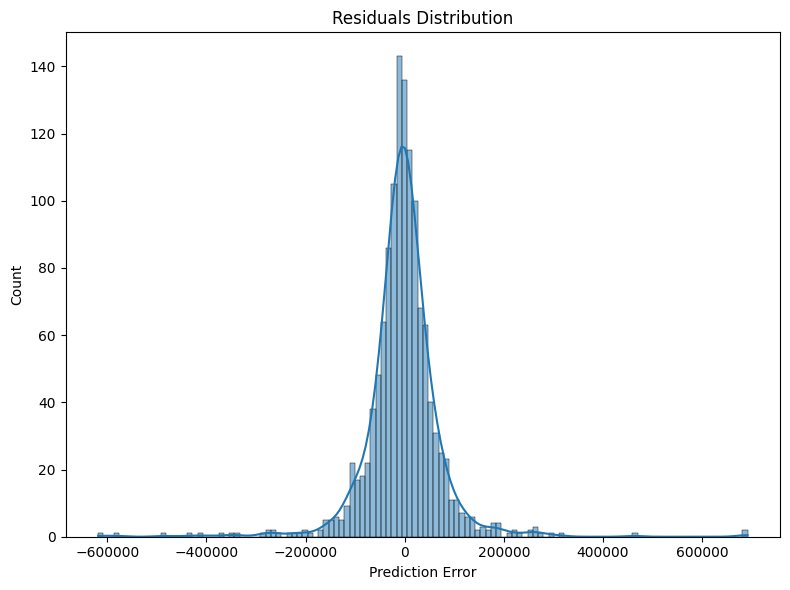

In [46]:
residuals = y_test - y_pred_xgb
plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.xlabel("Prediction Error")
plt.tight_layout()
plt.show()


-----------------

<a id="7"></a>
<div style="background:rgb(202, 255, 251); color: #003366; font-family: monospace; font-weight: bold; font-size: 220%; text-align: center; border-bottom: 2px solid #3366ff;">
  7. CONCLUSION
</div>

The Walmart Sales Forecasting project successfully demonstrates the power of machine learning in solving real-world retail prediction problems. By leveraging the historical sales data and performing thorough feature engineering, exploratory analysis, and hyperparameter tuning, we built an effective model using **XGBoost Regressor**.

After applying **Grid Search for hyperparameter optimization**, the model achieved:

* **RMSE:** 76,214.40
* **R² Score:** 0.981

These results indicate that the model explains **98.1% of the variance** in weekly sales, reflecting a **high level of predictive accuracy**. The relatively low RMSE further confirms the model’s robustness in forecasting sales across various stores and departments.

This predictive system can serve as a valuable decision-support tool for Walmart, helping in **inventory planning, staffing, marketing strategies, and financial forecasting**, especially around high-impact weeks like major holidays.

---

